# Intro to Tree Models 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns 
%matplotlib inline 

In [4]:
df = pd.read_csv("kyphosis.csv")

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


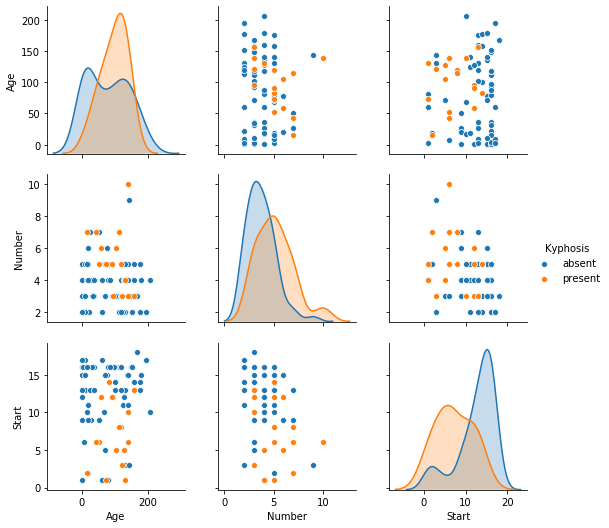

In [7]:
sns.pairplot(df, hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis', axis=1)

In [11]:
y=df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [41]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, predictions))
print('\n')
print (classification_report(y_test, predictions))

[[18  4]
 [ 0  3]]


              precision    recall  f1-score   support

      absent       1.00      0.82      0.90        22
     present       0.43      1.00      0.60         3

    accuracy                           0.84        25
   macro avg       0.71      0.91      0.75        25
weighted avg       0.93      0.84      0.86        25



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print (classification_report(y_test, rfc_pred))

[[20  2]
 [ 0  3]]


              precision    recall  f1-score   support

      absent       1.00      0.91      0.95        22
     present       0.60      1.00      0.75         3

    accuracy                           0.92        25
   macro avg       0.80      0.95      0.85        25
weighted avg       0.95      0.92      0.93        25



In [28]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

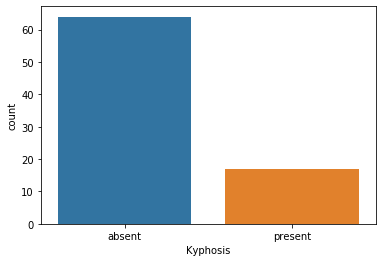

In [33]:
sns.countplot(df['Kyphosis'])

# Tree Visualization

In [38]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import datasets

Index(['Age', 'Number', 'Start'], dtype='object')

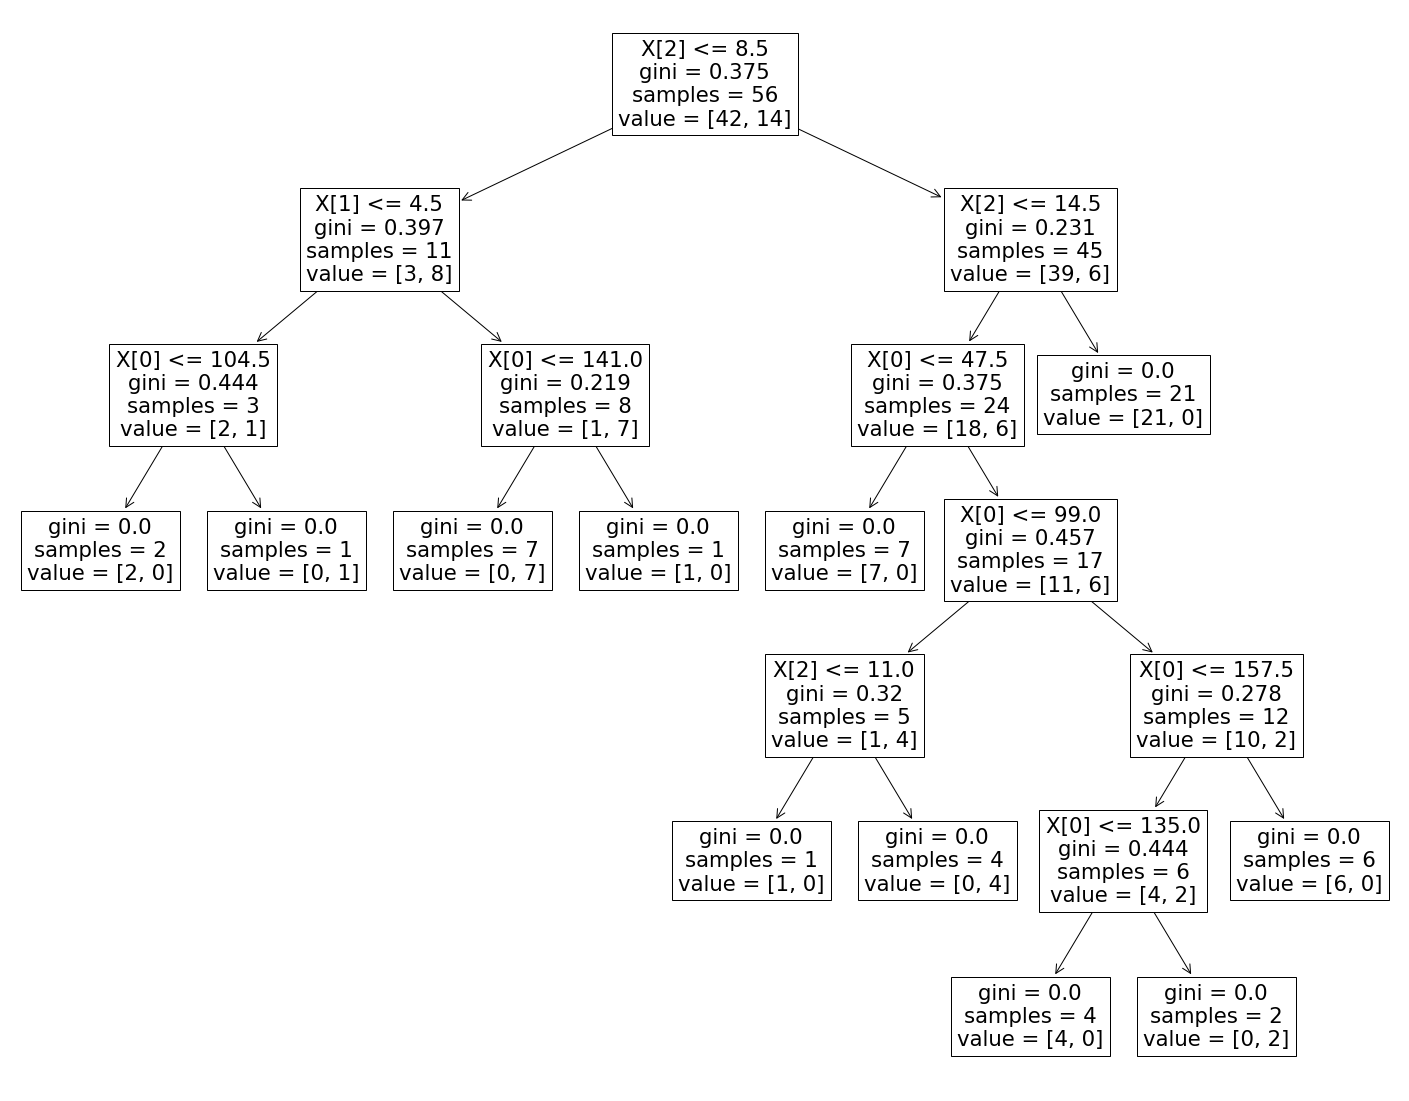

In [51]:
fig = plt.figure(figsize=(25,20))
p = tree.plot_tree(dtree)
